In [1]:
import matplotlib.pyplot as mat
import pandas as pd
import requests
import json
import numpy as np
import datetime
import matplotlib.dates as mdates

def graph_Data(base_url, data_Type, topic2_Address,x_Label):

    response = requests.get(base_url)
    
    total_Data = response.json()
    
    any_Data = []
        
    dates = []
    
    for i in range(len(total_Data['data'])):
        any_Data.append(total_Data['data'][i][data_Type])
    
    for i in range(len(total_Data['data'])):
        dates.append(total_Data['data'][i]['timestamp'])
    
    dates = [date[5:10] for date in dates]
    
    
    any_Data.reverse()
        
    dates.reverse()

    block_Response = requests.get(f"https://api.etherscan.io/v2/api?chainid=1&module=logs&action=getLogs&toBlock=22313155&address=0x40907540d8a6C65c637785e8f8B742ae6b0b9968&topic2={topic2_Address}&page=1&offset=1000&apikey=SBBG1DGT11MVX5ZJQX9EVNYBA1HZCI8QII")

    block_Data = block_Response.json()

    exec_Time = block_Data['result'][1]['timeStamp']

    exec_Time = int(exec_Time, 16)
    
    exec_Time = datetime.datetime.fromtimestamp(exec_Time)

    exec_Time = str(exec_Time)

    exec_Time = exec_Time[5:10]

    
    mat.plot(dates, any_Data)
    
    mat.xlabel('Date')
    mat.ylabel(x_Label)
    
    mat.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    mat.gca().xaxis.set_major_locator(mdates.MonthLocator(interval = 4))
    mat.axvline(x=exec_Time, color='r', linestyle='--', label='Specific Date')
    mat.axvline(x='02-11', color='r', linestyle='--', label='Specific Date')


    mat.figure(figsize=(20, 6))

    mat.show()
    print(exec_Time)


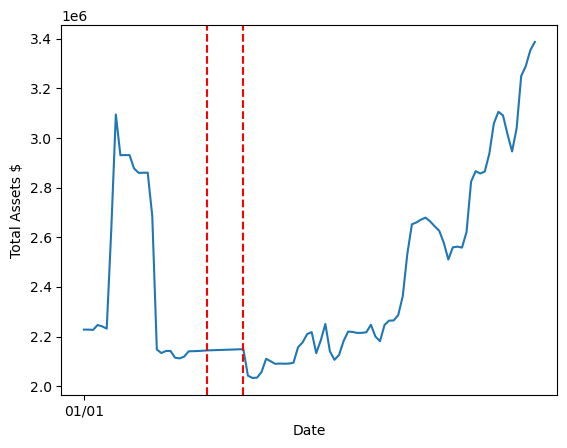

<Figure size 2000x600 with 0 Axes>

02-19


In [2]:
#this is sUSDe total asset graph

controller_Address = '0xEdA215b7666936DEd834f76f3fBC6F323295110A'

#look in curve proposal for address call is being sent to
address_to_without_0x = 'EdA215b7666936DEd834f76f3fBC6F323295110A'

what_Data = 'total_assets'
#choices for data type are 'lend_apy' 'borrow_apy' 'total_debt' 'total_assets' 

x_Label = 'Total Assets $'


#grpahing borrowing data
graph_Data(f'https://prices.curve.fi/v1/lending/markets/ethereum/{controller_Address}/snapshots?fetch_on_chain=false&agg=day&limit=100&sort_by=DATE_DESC',what_Data,f'0x000000000000000000000000{address_to_without_0x}', x_Label)


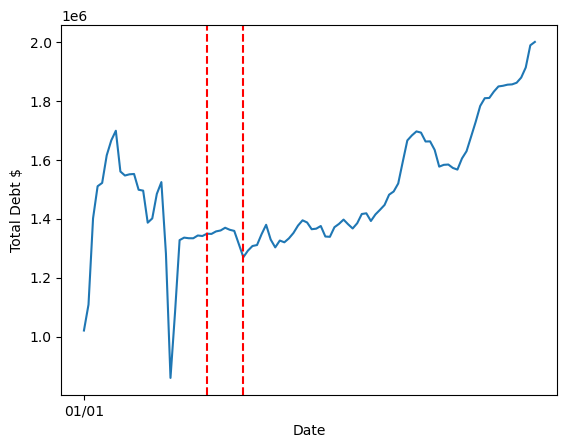

<Figure size 2000x600 with 0 Axes>

02-19


In [3]:


what_Data = 'total_debt'
#choices for data type are 'lend_apy' 'borrow_apy' 'total_debt' 'total_assets' 

x_Label = 'Total Debt $'


#grpahing borrowing data
graph_Data(f'https://prices.curve.fi/v1/lending/markets/ethereum/{controller_Address}/snapshots?fetch_on_chain=false&agg=day&limit=100&sort_by=DATE_DESC',what_Data,f'0x000000000000000000000000{address_to_without_0x}', x_Label)


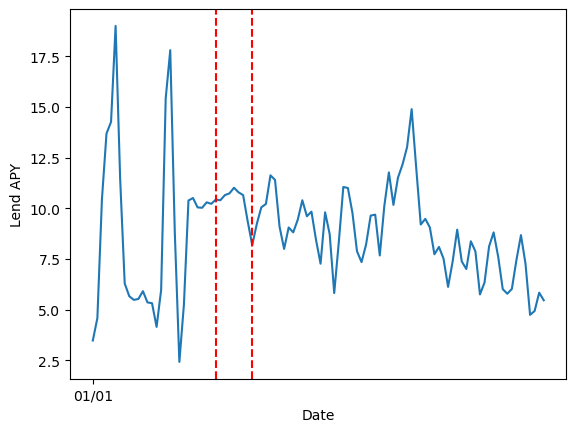

<Figure size 2000x600 with 0 Axes>

02-19


In [4]:


what_Data = 'lend_apy'
#choices for data type are 'lend_apy' 'borrow_apy' 'total_debt' 'total_assets' 

x_Label = 'Lend APY'


#grpahing borrowing data
graph_Data(f'https://prices.curve.fi/v1/lending/markets/ethereum/{controller_Address}/snapshots?fetch_on_chain=false&agg=day&limit=100&sort_by=DATE_DESC',what_Data,f'0x000000000000000000000000{address_to_without_0x}', x_Label)


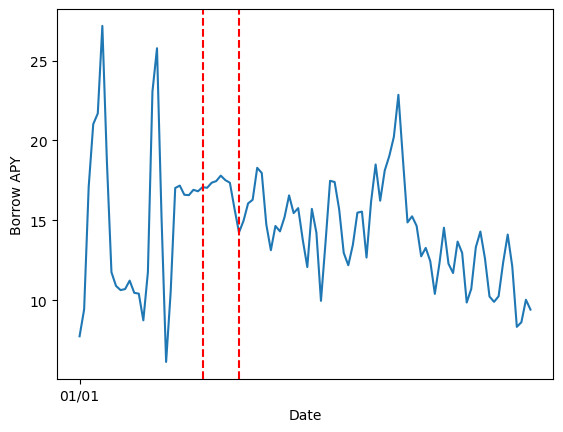

<Figure size 2000x600 with 0 Axes>

02-19


In [5]:

what_Data = 'borrow_apy'
#choices for data type are 'lend_apy' 'borrow_apy' 'total_debt' 'total_assets' 

x_Label = 'Borrow APY'


#grpahing borrowing data
graph_Data(f'https://prices.curve.fi/v1/lending/markets/ethereum/{controller_Address}/snapshots?fetch_on_chain=false&agg=day&limit=100&sort_by=DATE_DESC',what_Data,f'0x000000000000000000000000{address_to_without_0x}', x_Label)


In [6]:
# The proposal that was introduced on 2/11 to the Curve DAO sought to replace monetary policy for the CRV-long Llamalend market.
# In the resulting graphs above, the first dotted red line is when the proposal took was introduced and the second line being when the monetary policy was enacted.
# There appears to be no difference in the amount of total assets deposited and the total assets borrowed.
# However, both borrow APY and lending APY seem to remain stable, likely due to the utilization at the time of the proposal being close to the target utilization. This means the new interest curve would have a smaller effect on lending/borrowing APY.
# Overall, the monetary policy change seemed to have no effect on the activity in the CRV-long Llamalend market.